# BBC text classification


### Import Libraries

In [1]:
import csv
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Define Parameters

In [2]:
train_split = 0.9
VOCAB_SIZE = 10000
OOV_TOK = '<oov>'
PADDING = 'post'
TRUNC = 'post'
MAX_LENGTH = 2000
EMBEDDING_DIM = 16
EPOCHS = 20

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


### Load Data

In [3]:
#### Download Data

In [4]:
sentences = []
labels = []

with open("D:\\Datasets\\bbc_text\\bbc_text.csv") as file:
    csvReader = csv.reader(file)
    next(csvReader)
    for row in csvReader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            sentence = sentence.replace(' '+word+' ', ' ')
            sentence = sentence.replace('  ', ' ')
        sentences.append(sentence)

print(len(sentences))
print(len(labels))

2225
2225


In [5]:
split_index = int(train_split*len(sentences))

train_sent = sentences[:split_index]
train_labels = labels[:split_index]

val_sent = sentences[split_index:]
val_labels = labels[split_index:]

print(len(train_sent))
print(len(train_labels))
print(len(val_sent))
print(len(val_labels))

2002
2002
223
223


#### Convert sentences to sequences

In [6]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOK)
tokenizer.fit_on_texts(train_sent)
word_index = tokenizer.word_index

print(len(word_index))

28590


In [7]:
train_seq = tokenizer.texts_to_sequences(train_sent)
train_seq = pad_sequences(train_seq, padding=PADDING, truncating=TRUNC, maxlen=MAX_LENGTH)

val_seq = tokenizer.texts_to_sequences(val_sent)
val_seq = pad_sequences(val_seq, padding=PADDING, truncating=TRUNC, maxlen=MAX_LENGTH)

print (train_seq.shape)
print(val_seq.shape)

(2002, 2000)
(223, 2000)


#### Convert labels to numbers

In [8]:
tokenizer_label = Tokenizer()
tokenizer_label.fit_on_texts(train_labels)
train_labels_seq = tokenizer_label.texts_to_sequences(train_labels)
val_labels_seq = tokenizer_label.texts_to_sequences(val_labels)

train_labels_seq = np.array(train_labels_seq)
val_labels_seq = np.array(val_labels_seq)

classes = len(tokenizer_label.word_index) + 1
print (tokenizer_label.word_index)
print (train_labels_seq.shape)
print(val_labels_seq.shape)

{'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4, 'tech': 5}
(2002, 1)
(223, 1)


### Define Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(classes, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 16)          160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 205,798
Trainable params: 205,798
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(train_seq, train_labels_seq, epochs=EPOCHS, validation_data=(val_seq, val_labels_seq), verbose=1)

Train on 2002 samples, validate on 223 samples
Epoch 1/20
2002/2002 [==============================] - 193s 96ms/sample - loss: 1.6455 - acc: 0.2373 - val_loss: 1.5660 - val_acc: 0.4305
Epoch 2/20
2002/2002 [==============================] - 190s 95ms/sample - loss: 1.1247 - acc: 0.5864 - val_loss: 0.7919 - val_acc: 0.6816
Epoch 3/20
2002/2002 [==============================] - 195s 97ms/sample - loss: 0.6192 - acc: 0.7542 - val_loss: 0.6633 - val_acc: 0.7130
Epoch 4/20
2002/2002 [==============================] - 238s 119ms/sample - loss: 0.4188 - acc: 0.8941 - val_loss: 1.3708 - val_acc: 0.6457
Epoch 5/20
2002/2002 [==============================] - 179s 89ms/sample - loss: 0.6113 - acc: 0.8566 - val_loss: 0.6103 - val_acc: 0.8072
Epoch 6/20
2002/2002 [==============================] - 186s 93ms/sample - loss: 0.2185 - acc: 0.9795 - val_loss: 0.5187 - val_acc: 0.8430
Epoch 7/20
2002/2002 [==============================] - 195s 97ms/sample - loss: 0.0943 - acc: 0.9980 - val_loss: 0.50

### Plot results

C:\Users\XARC\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XARC\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XARC\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XARC\Anaconda3\lib\site-p

<Figure size 432x288 with 0 Axes>

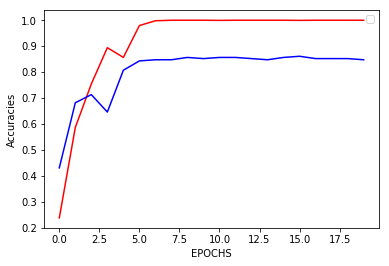

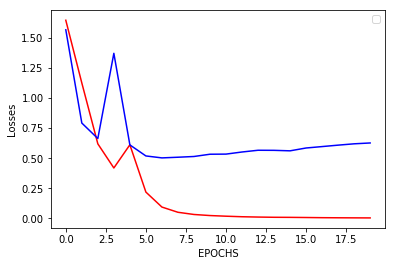

<Figure size 432x288 with 0 Axes>

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracies')
plt.legend('Train Acc', 'Val Acc')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Losses')
plt.legend('Train Loss', 'Val Loss')
plt.figure()